<a href="https://colab.research.google.com/github/wahyufajar879/PCVK_Genap_2023/blob/main/Week6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [88]:
from google.colab import drive

# Accessing My Google Drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [89]:
import cv2 as cv
from google.colab.patches import cv2_imshow
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import math
import os
import glob

<BarContainer object of 256 artists>

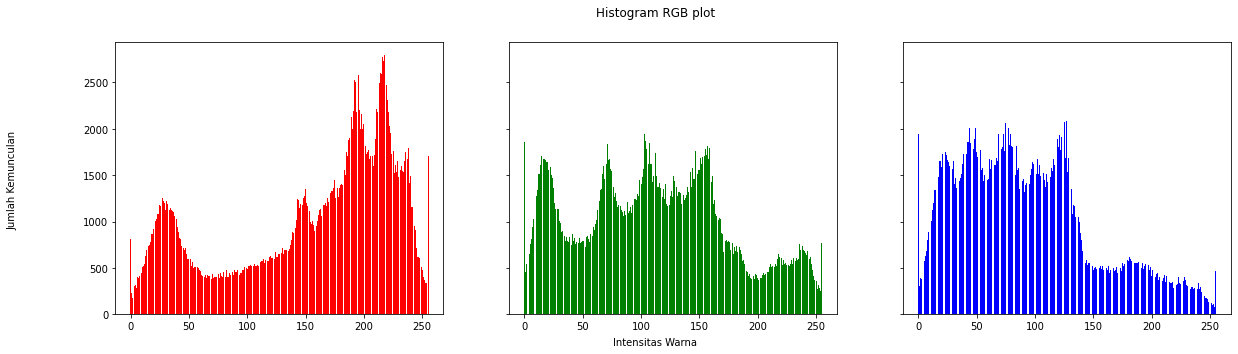

In [90]:
image = cv.imread('/content/drive/MyDrive/PCVK/Week6/lena.jpg')
height, width, depth = np.shape(image)
names = np.arange(256)

blue = [0]*256
green = [0]*256
red = [0]*256

for y in range(0,height):
  for x in range(0,width):
    blue[image[y][x][0]] += 1
    green[image[y][x][1]] += 1
    red[image[y][x][2]] += 1

names = np.arange(256)
fig, axs = plt.subplots(1, 3, figsize=[20,5], sharex=True, sharey=True)
fig.suptitle('Histogram RGB plot')
fig.text(0.05, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
axs[0].bar(names, red, color='red')
axs[1].bar(names, green, color='green')
axs[2].bar(names, blue, color='blue')

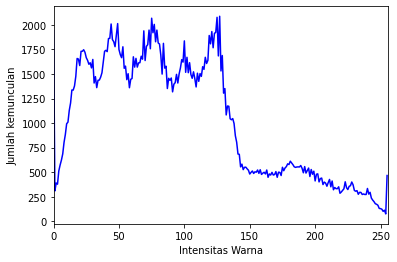

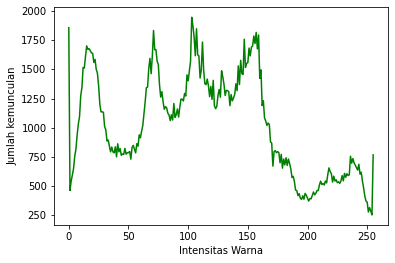

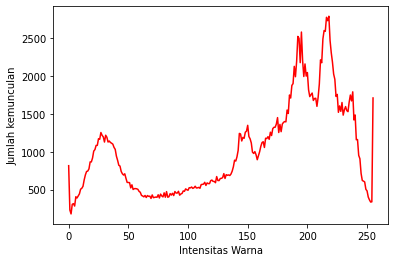

In [91]:
colors = ("b","g","r")
channel_ids = (0, 1, 2)

plt.xlim([0, 256])
for channel_id, c in zip(channel_ids, colors):
  histogram, bin_edges = np.histogram(
      image[:, :, channel_id], bins=256, range =(0,256)
  )
  plt.plot(bin_edges[0:-1], histogram, color=c)

  plt.xlabel("Intensitas Warna")
  plt.ylabel("Jumlah kemunculan")

  plt.show()

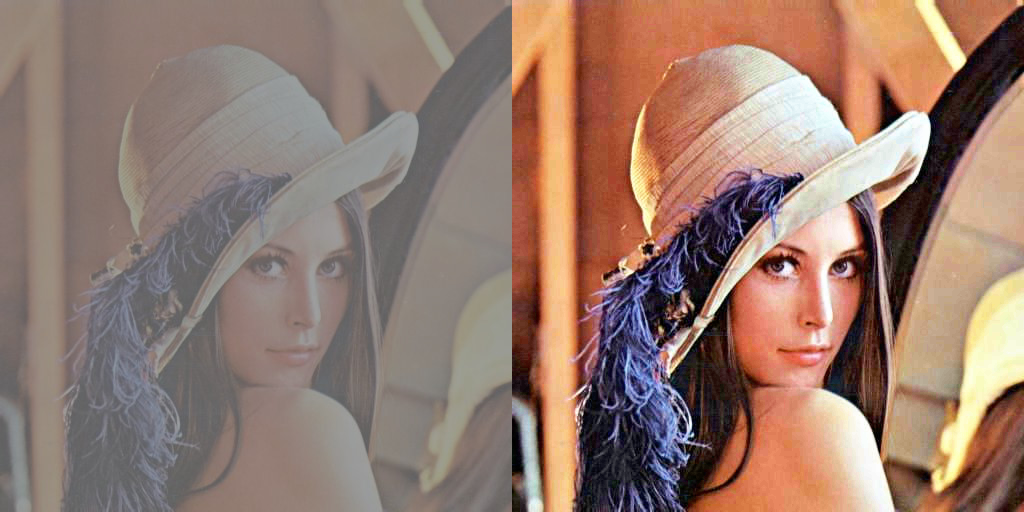

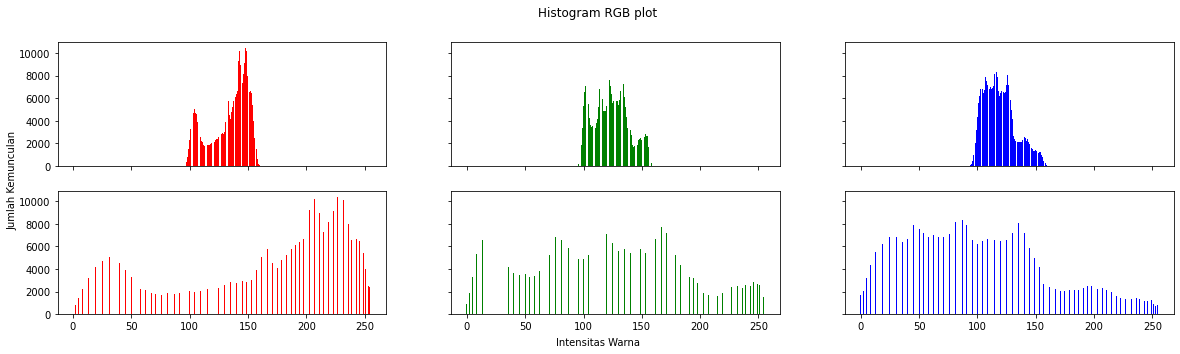

In [73]:
img1 = cv.imread('/content/drive/MyDrive/PCVK/Week6/lena_lc.jpg') 
def histo(img1):
  tinggi, lebar, depth = np.shape(img1) 
  ax = np.zeros((3,256)) # np.zeros digunakan untuk membuat array sesuai parameter 3 untuk jumlah array, 256 untuk range array 
  for y in range(0,tinggi) : 
    for x in range(0,lebar) :
      ax[0][img1[y][x][0]] += 1 
      ax[1][img1[y][x][1]] += 1
      ax[2][img1[y][x][2]] += 1 
  return ax

histo_asli = histo(img1)

#convert to Numpy array 
img_array = np.asarray(img1)

#Step 1: Melakukan normalisasi komulatif histogram
#meratakan nilai array pada sebuah gambar dan menghitung nilai histogram berdasarkan pengelompokkan  
histogram_array = np.bincount(img_array.flatten(), minlength=256)

# normalisasi
num_pixels = np.sum(histogram_array) 
histogram_array = histogram_array/num_pixels

#melakukan normalisasi komulatif histogram 
chistogram_array = np.cumsum(histogram_array)

#Step 2: Pixel mapping lookup table
transform_map = np.floor(255 * chistogram_array). astype (np.uint8)

#Step 3: Transformation
# flatten image array into 10 list 
img_list = list(img_array.flatten())

# transform pixel values to equalize 
eq_img_list = [transform_map[p] for p in img_list]

# reshape and write back into img_array 
eq_img_array = np.reshape(np.asarray(eq_img_list), img_array.shape) 
img2 = eq_img_array

equal_histo = histo(img2)

final_frame = cv.hconcat((img1, img2)) #concatenate image
cv2_imshow(final_frame)

names = np.arange (256) 
isgrayimg = np.array_equal(biru, hijau, merah) 
if (isgrayimg == False):
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey=True) 
  fig.suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histo_asli[2], color='red') 
  axs[0,1].bar(names, histo_asli[1], color='green') 
  axs[0,2].bar(names, histo_asli[0], color='blue') 
  axs[1,0].bar(names, equal_histo[2], color='red') 
  axs[1,1].bar(names, equal_histo[1], color='green')
  axs[1,2].bar(names, equal_histo[0], color='blue') 
else:
  fig, axs = plt. subplots(1, 2, figsize=[20,5], sharex=True, sharey=True) 
  fig. suptitle('Histogram RGB plot') 
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical') 
  fig.text(0.5, 0.94, 'Intensitas Warna', ha='center') 
  axs[0,0].bar(names, histo_asli[2], color='gray') 
  axs[0,1].bar(names, equal_histo[2], color='gray')

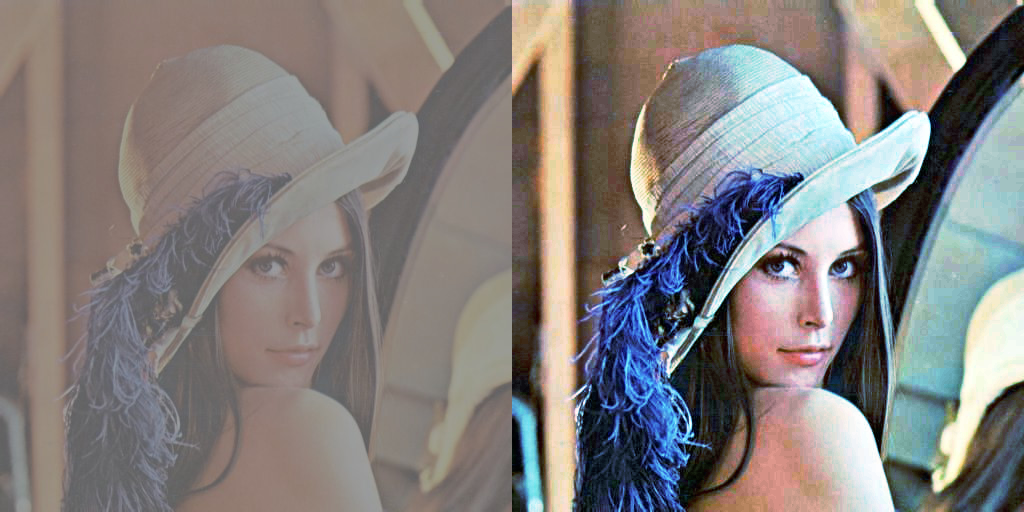

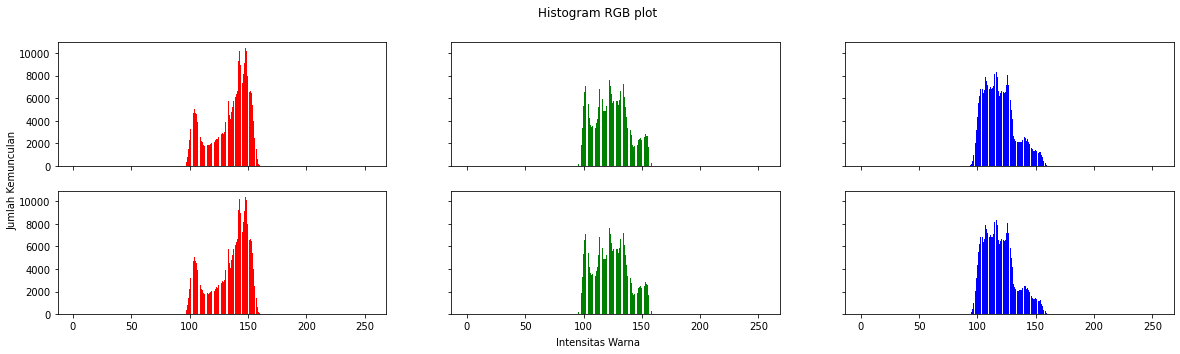

In [74]:
channels = cv.split(img1) # cv.split digunakan untuk memecah array pada gambar
eq_channels = [] # inisiaisasi array untuk menyimpan value channel color dari gambar
for ch, color in zip(channels, ["r", "g", "b"]):
  eq_channels.append(cv.equalizeHist(ch)) # equalizehist berfungsi untuk mengkonferdsi gambar ke gray scale
eq_image = cv.merge(eq_channels)
equal_histo = histo(eq_image)

final_frame = cv.hconcat((img1, eq_image)) # hconcat menggabungkan (menempel sejajar) dua gambar
cv2_imshow(final_frame)

# Menampilkan gra
names = np.arange(256)
isgraying = np.array_equal(biru, hijau, merah) # array_aqeual berfungsi untuk membandingkan nilai array warna  hijua, biru, merah
if (isgraying == False):                       # jika array berjumlah sama maka hasilnya true, begitu sebaliknya
  fig, axs = plt.subplots(2, 3, figsize=[20,5], sharex=True, sharey =True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='red')
  axs[0,1].bar(names, histo_asli[1], color='green')
  axs[0,2].bar(names, histo_asli[0], color='blue')
  axs[1,0].bar(names, histo_asli[2], color='red')
  axs[1,1].bar(names, histo_asli[1], color='green')
  axs[1,2].bar(names, histo_asli[0], color='blue')
else:
  fig, axs = plt.subplots(1, 2, figsize=[20,5], sharex=True, sharey=True)
  fig.suptitle('Histogram RGB plot')
  fig.text(0.09, 0.5, 'Jumlah Kemunculan', va='center', rotation='vertical')
  fig.text(0.5, 0.04, 'Intensitas Warna', ha='center')
  axs[0,0].bar(names, histo_asli[2], color='gray')
  axs[0,1].bar(names, equal_histo[2], color='gray')

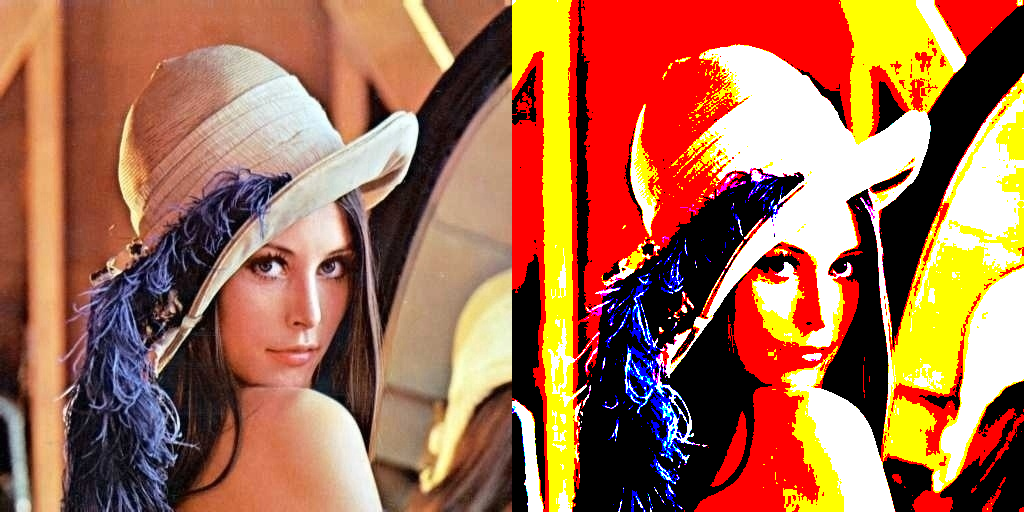

True

In [75]:
def warnaTerdekat (r, g, b):
  pValue = 0
  minDistance = 255*255 + 255*255 + 255*255 + 1
  warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
  for i in range(len(warnaPallette)):
    rDiff = r - warnaPallette[i][0]
    gDiff = g - warnaPallette[i][1]
    bDiff = b - warnaPallette[i][2]
    distance = rDiff*rDiff + gDiff*gDiff + bDiff*bDiff
    if (distance < minDistance):
      minDistance = distance
      pValue = i
  return pValue

warnaPallette = [[0, 0, 0], [255, 0, 0], [0, 255, 0], [255, 255, 0], [0, 0, 255], [255, 0, 255], [0, 255, 255], [255, 255, 255]]
img_16 = cv.cvtColor(img_l, cv.COLOR_BGR2RGB)
img_8 = np.zeros(img_16.shape, img_16.dtype)

for y in range(0, img_16.shape[0]):
  for x in range(0, img_16.shape[1]):
    baru = warnaTerdekat(img_16[y, x, 0], img_16[y, x, 1], img_16[y, x, 2])
    img_8[y, x] = warnaPallette[baru]
    
img_16 = cv.cvtColor(img_16, cv.COLOR_BGR2RGB)
img_8 = cv.cvtColor(img_8, cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((img_16, img_8))
cv2_imshow(final_frame)
cv.imwrite('/content/drive/MyDrive/PCVK/Week6/lena.jpg', img_8)

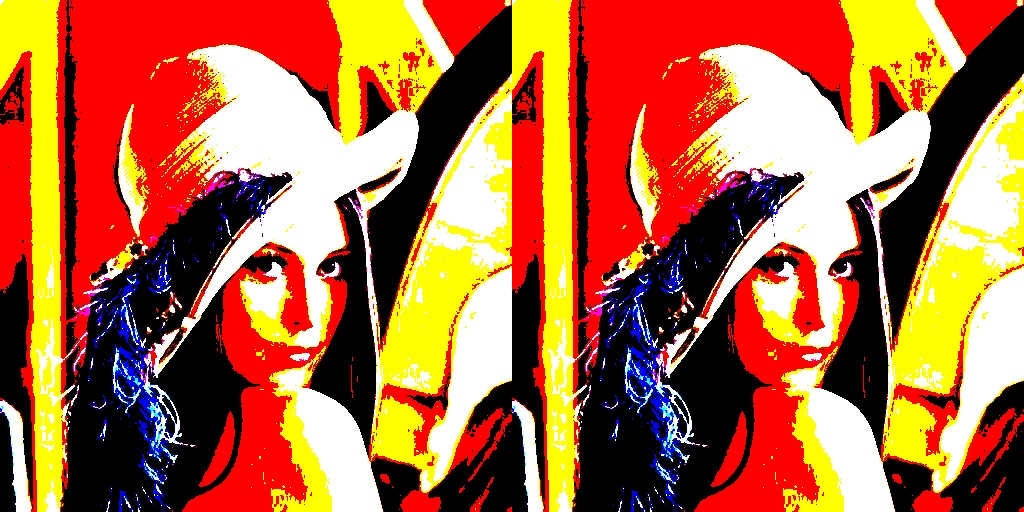

In [76]:

from PIL import Image

# Load image and convert it to RGB using Floyd-Steinberg dithering
imageConvert = Image.open('/content/drive/MyDrive/PCVK/Week6/lena.jpg').convert(mode='RGB', dither=Image.FLOYDSTEINBERG)
imageConvert.save('/content/drive/MyDrive/PCVK/Week6/lena2.jpg')

# Load the original image
ImageOriginal = cv.imread('/content/drive/MyDrive/PCVK/Week6/lena.jpg')

# Load the dithered image
ImageDithered = cv.imread('/content/drive/MyDrive/PCVK/Week6/lena.jpg')

# Display the original and dithered images
final_frame = cv.hconcat((ImageOriginal, ImageDithered))
cv2_imshow(final_frame)

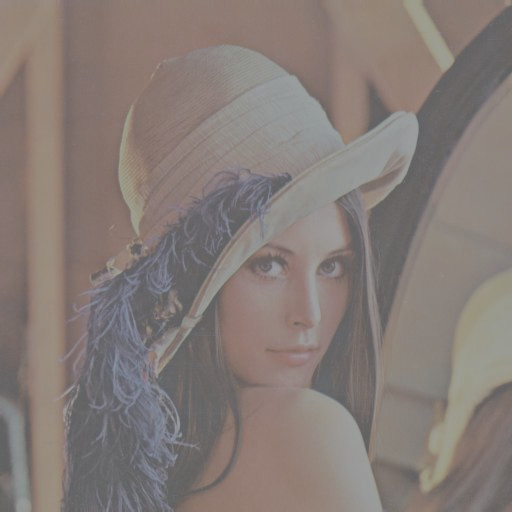

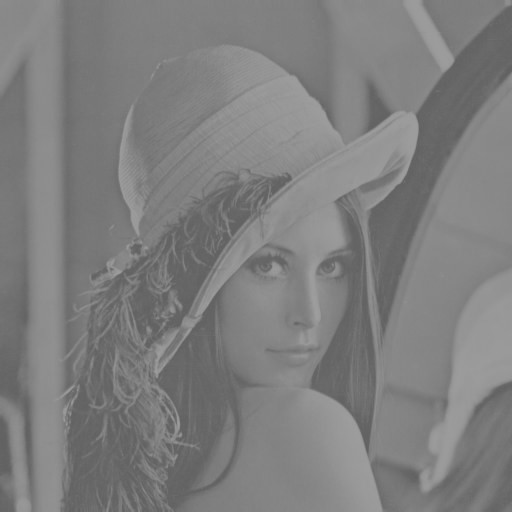

In [77]:
img_ori = cv.imread('/content/drive/MyDrive/PCVK/Week6/lena_lc.jpg')

img_gray= cv.imread('/content/drive/MyDrive/PCVK/Week6/lena_lc.jpg', cv.IMREAD_GRAYSCALE)

# Display the img_ori and img_gray
cv2_imshow(img_ori)
cv2_imshow(img_gray)

In [78]:
from PIL import Image
import cv2

imageLena = Image.open('/content/drive/MyDrive/PCVK/Week6/lena_lc.jpg').convert(mode='1',dither=Image.FLOYDSTEINBERG)
imageLena.save('/content/drive/MyDrive/PCVK/Week6/lena_lc.jpg')


Image = cv2.imread('/content/drive/MyDrive/PCVK/Week6/lena_lc.jpg')
Image2 = cv2.imread('/content/drive/MyDrive/PCVK/Week6/lena_lc.jpg')
image_2 = cv.cvtColor(Image2, cv.COLOR_BGR2RGB)

FloydSteinberg = cv2.cvtColor(Image, cv2.COLOR_BGR2GRAY)
cv2.imwrite('/content/drive/MyDrive/PCVK/Week6/lena_lc.jpg', FloydSteinberg)


# implementasikan proses dithering Floyd and Steinberg
Height = FloydSteinberg.shape[0]
Width = FloydSteinberg.shape[1]

for y in range(0, Height):
    for x in range(0, Width):

        old_value = FloydSteinberg[y, x]
        new_value = 0
        if (old_value > 128) :
            new_value = 255

        FloydSteinberg[y, x] = new_value

        Error = old_value - new_value

        if (x255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            FloydSteinberg[y, x+1] = NewNumber

        if (x>0 and y255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            FloydSteinberg[y+1, x-1] = NewNumber

        if (y255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            FloydSteinberg[y+1, x] = NewNumber

        if (y255) : NewNumber=255
            elif (NewNumber<0) : NewNumber=0
            FloydSteinberg[y+1, x+1] = NewNumber

# cv2.imshow(Image)
cv2.imwrite('/content/drive/MyDrive/PCVK/Week6/lena_lc.jpg', FloydSteinberg)
cv2_imshow(FloydSteinberg)

IndentationError: ignored